#  TASK - 03

## SVM implementation

In [16]:

import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from tqdm import tqdm



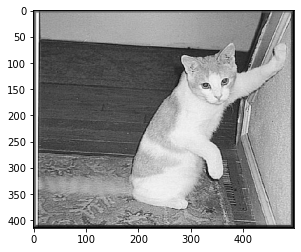

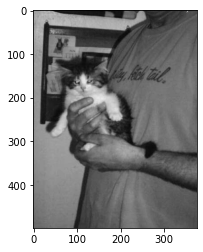

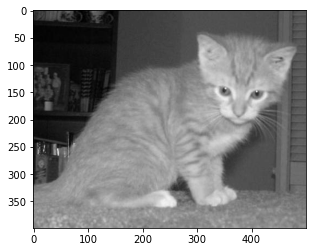

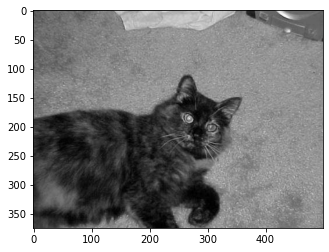

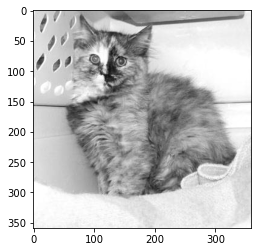

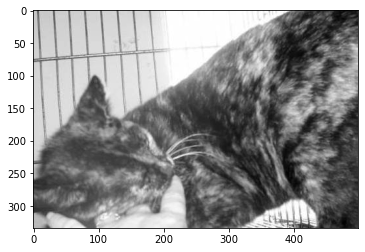

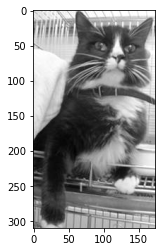

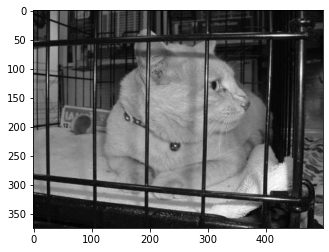

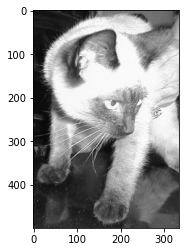

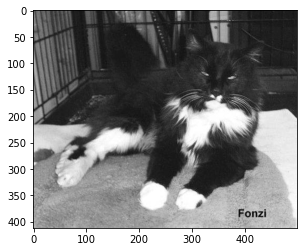

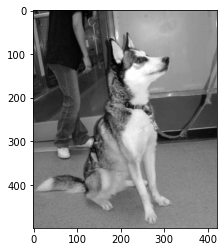

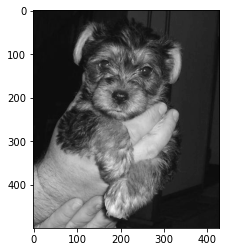

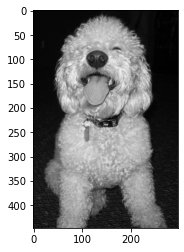

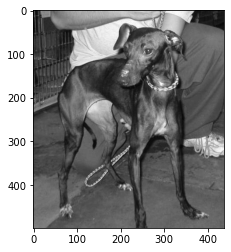

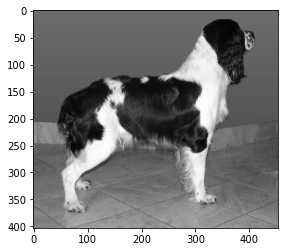

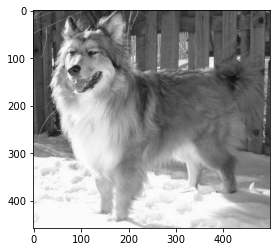

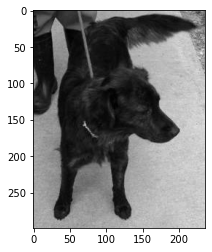

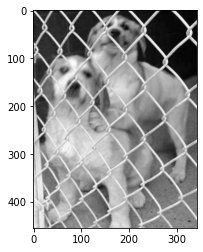

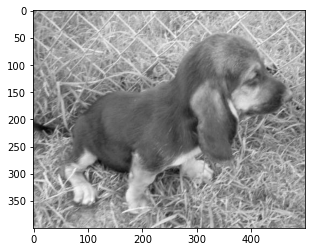

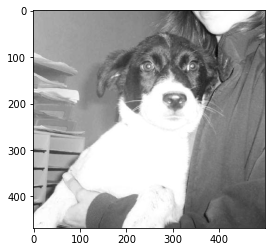

In [17]:
data='C:\\Users\\Shruti\\Desktop\\Prodigy Infotech\\cats n dogs\\test_set'
categories =["cats","dogs"]
for category in categories:
    path=os.path.join(data,category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if x==10:
            break

In [18]:
print(img_array)
print(img_array.shape)

[[176 176 176 ... 136 132 130]
 [176 176 176 ... 126 129 134]
 [176 176 176 ... 134 143 152]
 ...
 [246 247 248 ...  66  66  65]
 [246 247 248 ...  66  66  65]
 [246 247 248 ...  66  66  65]]
(468, 499)


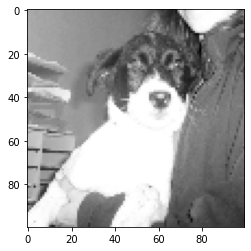

In [19]:
image_size=100
newarray=cv2.resize(img_array,(image_size,image_size))
plt.imshow(newarray,cmap='gray')
plt.show()

In [20]:
def load_images(directory, img_size):
    images = []
    labels = []
    for label, subdir in enumerate(['cats', 'dogs']):  
        subdir_path = os.path.join(directory, subdir)
        for file in tqdm(os.listdir(subdir_path)):
            img_path = os.path.join(subdir_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
            img = cv2.resize(img, (img_size, img_size)) 
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


In [21]:
image_size = 64  

X, y = load_images(data, image_size)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 483.45it/s]


In [22]:
X = X / 255.0
X_flattened = X.reshape(X.shape[0], -1) 
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [23]:
svm = SVC(kernel='linear')  # Linear kernel for binary classification
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred = svm.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 52.50%


In [26]:
def plot_images(images, labels, predictions, img_size, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(img_size, img_size), cmap='gray')
        title = f'Predicted: {"Cat" if predictions[i] == 0 else "Dog"}, Actual: {"Cat" if labels[i] == 0 else "Dog"}'
        plt.title(title)
        plt.axis('off')
    plt.show()

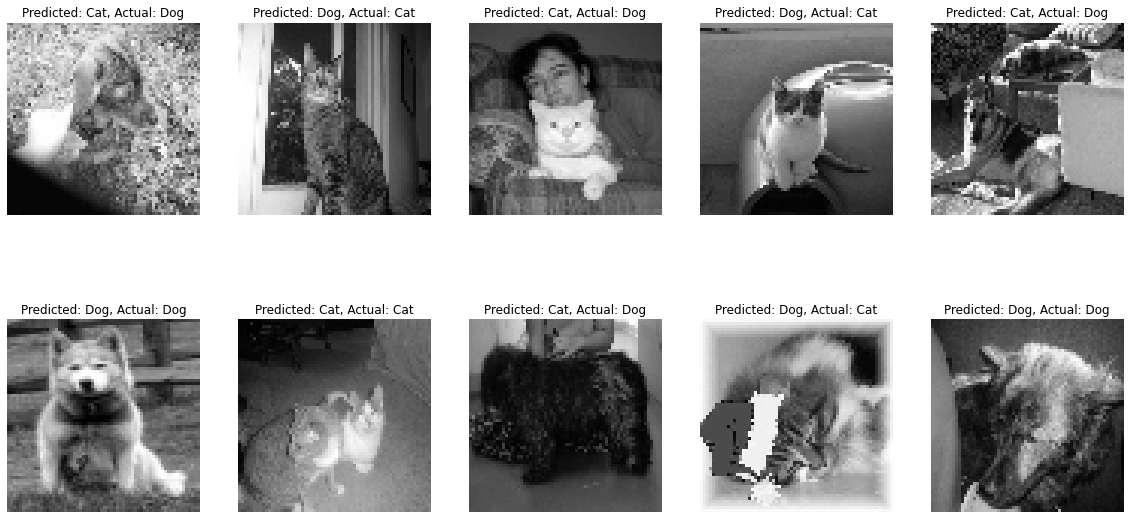

In [27]:
plot_images(X_test, y_test, y_pred, image_size)